In [1]:
!python -V

Python 3.9.7


In [2]:
!nvidia-smi

Fri Nov 17 14:27:47 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.01                 Driver Version: 546.01       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  | 00000000:01:00.0 Off |                  Off |
| 57%   70C    P2             413W / 450W |  16265MiB / 24564MiB |     94%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# !git clone https://github.com/NVlabs/stylegan3

In [4]:
# model_save_dir : google drive에 model 저장 path
# train_data_dir : 학습에 사용할 data path (directory, not zip)
# model_save_dir = 'C://Users/user/Desktop/딥러닝/GAN/model'
train_data_dir = 'C://Users/user/Desktop/workspace2/manu_data/full'

In [5]:
pwd

'C:\\Users\\user\\Desktop\\workspace2\\stylegan3'

In [6]:
# import os

# os.chdir('stylegan3')
# os.getcwd()

In [7]:
import shutil
import os

os.mkdir('train_dataset')

In [8]:
pwd

'C:\\Users\\user\\Desktop\\workspace2\\stylegan3'

In [9]:
train_data_dir

'C://Users/user/Desktop/workspace2/manu_data/full'

In [10]:
# import os

# # 디렉토리 경로 설정
# directory_path = 'C://Users/user/Desktop/workspace/stylegan3/image'

# # 디렉토리 내의 모든 파일에 대해 반복
# for idx, filename in enumerate(os.listdir(directory_path)):
#     # 파일 확장자 확인 (이미지 파일만 처리)
#     if filename.endswith(('.png', '.jpg', '.jpeg')):
#         # 숫자로 파일 이름 변경
#         new_filename = f"{idx + 1}.jpg"

#         # 기존 파일 경로 및 새 파일 경로 설정
#         old_filepath = os.path.join(directory_path, filename)
#         new_filepath = os.path.join(directory_path, new_filename)

#         # 파일 이름 변경
#         os.rename(old_filepath, new_filepath)

#         print(f"{filename} -> {new_filename}")


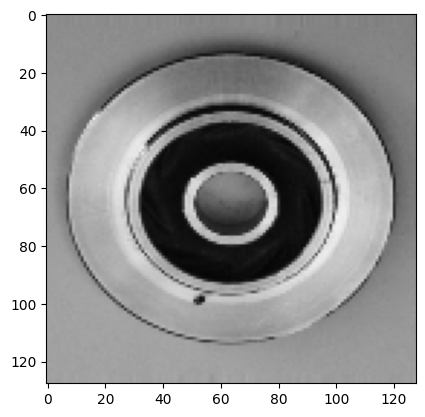

In [16]:
from glob import glob
# from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

dst = 'train_dataset/'

org_td_list = [ele for ele in glob(os.path.join(train_data_dir, '**'), recursive=True) if ele.endswith('.jpeg')]

# substring_to_remove = 'C://Users/user/Desktop/workspace/stylegan3/'

# # 각 문자열에서 부분을 삭제
# org_td_list = [string.replace(substring_to_remove, '') for string in org_td_list]

img_name = os.path.basename(org_td_list[0])

img = cv2.imread(org_td_list[0].encode('utf-8').decode('utf-8'))
img = cv2.resize(img, (128,128))
cv2.imwrite(os.path.join(dst, img_name), img)
plt.imshow(img)

In [17]:
org_td_list

['C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_1015.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_1046.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_146.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_177.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_255.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_33.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_42.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_430.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_466.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_def_0_93.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_ok_0_119.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_ok_0_129.jpeg',
 'C://Users/user/Desktop/workspace2/manu_data/full\\cast_ok_0_196.jpeg',
 'C://Users/user/Desktop/workspace2/manu_d

In [18]:
# substring_to_remove = 'C://Users/user/Desktop/딥러닝/GAN/stylegan3'

# # 각 문자열에서 부분을 삭제
# org_td_list = [string.replace(substring_to_remove, '') for string in org_td_list]

In [19]:
for img_path in org_td_list:
    img_name = os.path.basename(img_path)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    cv2.imwrite(os.path.join(dst, img_name), img)

In [20]:
dst_td_list = [ele for ele in glob(os.path.join(dst, '**'), recursive=True) if ele.endswith('.jpg')]

In [21]:
for img_path in dst_td_list:
    if cv2.imread(img_path).shape != (256, 256, 3):
        print(os.path.basename(img_path), cv2.imread(img_path).shape)

In [22]:
!python dataset_tool.py --source=./train_dataset --dest=./train_dataset/train.zip --resolution=128x128


100%|##########| 20/20 [00:00<00:00, 504.04it/s]


In [29]:
# os.environ['model_save_dir'] = model_save_dir

In [ ]:
!python train.py --outdir=./model_output --cfg=stylegan2 --data=./train_dataset/train.zip --gpus=1 --batch=8 --gamma=5.9 --mirror=1 --kimg=5000 --snap=50 --workers=6